In [1]:
!rm Percentilejjas.nc
!rm Percentilejjas2.nc


In [2]:
import cdo
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sst=xr.open_dataset("MJJAS.nc")
sst40=sst.sst.assign_coords({'time':sst.sst.time.dt.dayofyear})


In [4]:
sst1=xr.open_dataset("jjas40mean.nc")
sst1

<xarray.Dataset>
Dimensions:  (time: 4880, lon: 200, lat: 100)
Coordinates:
  * time     (time) datetime64[ns] 1982-06-01 1982-06-02 ... 2021-09-30
  * lon      (lon) float32 50.12 50.38 50.62 50.88 ... 99.12 99.38 99.62 99.88
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 24.12 24.38 24.62 24.88
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    CDI:            Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    history:        Tue Sep 13 11:08:51 2022: cdo -select,season=JJAS sst40ye...
    source:         NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    institution:    NOAA/NCDC
    Conventions:    CF-1.5
    title:          NOAA High-resolution Blended Analysis: Daily Values using...
    comment:        Reynolds, et al., 2007: Daily High-Resolution-Blended Ana...
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    CDO:            Climate Data Operators version 1.9.3 (http://mpimet.mpg.d...

In [5]:
!cdo -select,season=MJJAS percentile40.nc Percentilejjas.nc
da=xr.open_dataset("Percentilejjas.nc")
ds=da.__xarray_dataarray_variable__[27:].assign_coords({'time':da.__xarray_dataarray_variable__[27:].time.dt.dayofyear})
ds.to_netcdf("Percentilejjas2.nc")
da.__xarray_dataarray_variable__[27:]

cdo select: Processed 3060000 values from 1 variable over 365 timesteps [0.05s 133MB]


<xarray.DataArray '__xarray_dataarray_variable__' (time: 126, lat: 100, lon: 200)>
[2520000 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2021-05-28 2021-05-29 ... 2021-09-30
  * lon      (lon) float32 50.12 50.38 50.62 50.88 ... 99.12 99.38 99.62 99.88
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 24.12 24.38 24.62 24.88

In [6]:
Percentilejjas2=xr.open_dataset("Percentilejjas2.nc")

In [7]:
frq_40_list=[]
frq_40jjas_list=[]
inten_40_list=[]
for i in range(0,6120,153):
    dataset=sst40[27+i:153+i].assign_coords({'time':da.__xarray_dataarray_variable__[27:].time.dt.dayofyear})
    
    change1=dataset-Percentilejjas2
    change2=change1.__xarray_dataarray_variable__.rename('sst')
    change=change2.assign_coords({'time':da.__xarray_dataarray_variable__[27:].time.dt.dayofyear})
    
    logic1=xr.where(change>0,1,change)
    logic2=xr.where(logic1<0,0,logic1)
    logic=logic2.assign_coords({'time':da.__xarray_dataarray_variable__[27:].time.dt.dayofyear})
    
    l=[]
    for j in range(0,122):
        five_days=logic[j:j+5].sum('time',skipna=False)
        l.append(xr.where(five_days<5,0,five_days).data)
    five_xr=xr.DataArray(np.array(l), coords=[("time",logic[4:].time.data),("lat", logic[4:].lat.data), ("lon", logic[4:].lon.data)])

    five_xr_logic=xr.where(five_xr==5,1,five_xr)

    m=[]
    for k in range(0,122):
        a=five_xr_logic[k:k+2].sum("time",skipna=False)
        m.append(xr.where(a>1,0,a).data)
    five_xr_start=xr.DataArray(np.array(m), coords=[("time",logic[4:].time.data),("lat", logic[4:].lat.data), ("lon", logic[4:].lon.data)])
    frq_40jjas_list.extend(five_xr_start.data)
    frq_40_list.append(five_xr_start.sum("time",skipna=False).data)
    inten_40_list.append(xr.where(five_xr_logic==1,change[4:],five_xr_logic).sum("time",skipna=False).data)


In [8]:
frq_40jjas_list

[array([[ 0.,  0.,  0., ...,  0.,  0., nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[ 0.,  0.,  0., ...,  0.,  0., nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[ 0.,  0.,  0., ...,  0.,  0., nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[ 0.,  0.,  0., ...,  0.,  0., nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ..

In [9]:
sst.sst.time

<xarray.DataArray 'time' (time: 6120)>
array(['1982-05-01T00:00:00.000000000', '1982-05-02T00:00:00.000000000',
       '1982-05-03T00:00:00.000000000', ..., '2021-09-28T00:00:00.000000000',
       '2021-09-29T00:00:00.000000000', '2021-09-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1982-05-01 1982-05-02 ... 2021-09-30
Attributes:
    standard_name:  time
    long_name:      Time
    axis:           T

In [10]:
frq_40jjas=xr.DataArray(np.array(frq_40jjas_list), coords=[("time",sst1.sst.time.data),("lat", logic.lat.data), ("lon", logic.lon.data)])
frq_40jjas.to_netcdf("frq_40jjas.nc")

In [11]:
frq_40=xr.DataArray(np.array(frq_40_list), coords=[("time",logic[:40].time.data),("lat", logic.lat.data), ("lon", logic.lon.data)])
frq_40_sum=frq_40.sum("time",skipna=False)
frequency_40=xr.where(frq_40_sum%2==0,frq_40_sum//2,(frq_40_sum+1)/2)

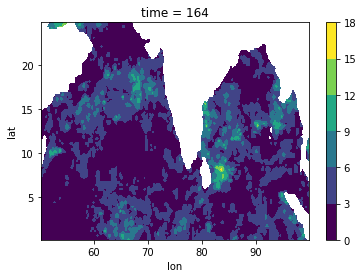

In [12]:
frq_40[16].plot.contourf()

In [13]:
inten_40=xr.DataArray(np.array(inten_40_list), coords=[("time",logic[:40].time.data),("lat", logic.lat.data), ("lon", logic.lon.data)])
cum_intensity=inten_40.sum("time",skipna=False)


In [14]:
frq_40_mean=frq_40[:,40:90,120:]
frq_40_mean.to_netcdf("frq_40_bob.nc")

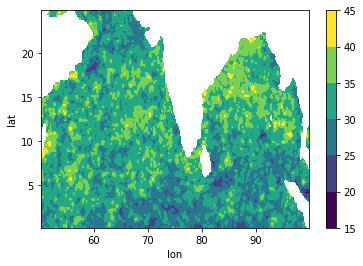

In [15]:
frequency_40.plot.contourf()

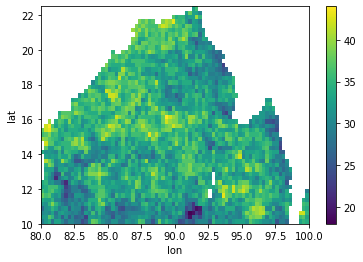

In [16]:
frequency_40[40:90,120:].plot()

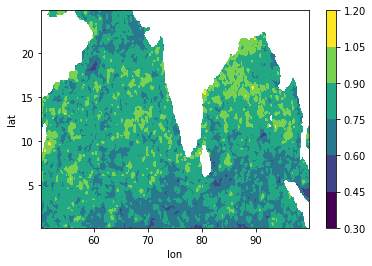

In [17]:
Avg_frequency_40=frequency_40/40
Avg_frequency_40.plot.contourf()

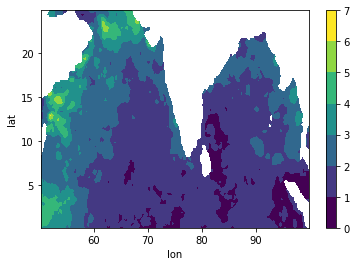

In [18]:
Avg_cum_intensity=cum_intensity/40
Avg_cum_intensity.plot.contourf()
plt.savefig("Avg_cum_intensity.png")

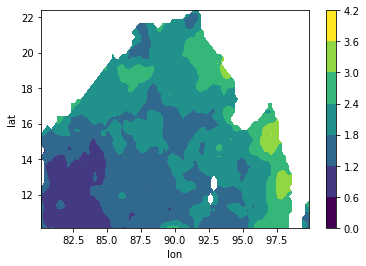

In [20]:
Avg_cum_intensity[40:90,120:].plot.contourf()

In [13]:
inten_40[:,:20,:50]

<xarray.DataArray (time: 40, lat: 20, lon: 50)>
array([[[ 0.        ,  0.        ,  0.        , ..., 11.63799992,
          3.88300381,  2.12100105],
        [ 0.        ,  0.        ,  0.        , ..., 11.18599777,
          8.80799828,  3.41899853],
        [ 0.        ,  0.        ,  0.        , ...,  9.39499626,
          7.77199841,  5.91599941],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.13999977,
          0.13599968,  0.26699867],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 1.6779995 ,  0.86499977,  1.20200043, ...,  2.90499916,
          1.69799824,  1.67999878],
        [ 0.26299896,  0.48900032,  1.07899914, ...,  2.07099857,
          1.52100201,  1.41499825],
        [ 0.60199947,  0.6150013 ,  0.7079998 , ...,  1.29200153,
          1.07700043,  1.41599998],
...
        [ 9.44300117, 10.84099827, 10.84900208, ...,  8.1689991 ,
          6.87500153,  5.43200111],
        [10.24399643, 12.65200291, 12.63099957, ...,  7.30400066,
          6.08999672,  3.80000229],
        [ 9.63600006, 11.9919981 , 13.74799957, ...,  5.78899803,
          4.64000092,  2.62899704]],

       [[ 0.05400124,  0.80599995,  2.22600136, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.45899906, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.22599812,  0.2239994 ,  0.51699905, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.24400196,  0.17099857,  0.17200031, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.07199993,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]])
Coordinates:
  * time     (time) int64 148 149 150 151 152 153 ... 182 183 184 185 186 187
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 4.125 4.375 4.625 4.875
  * lon      (lon) float32 50.12 50.38 50.62 50.88 ... 61.62 61.88 62.12 62.38

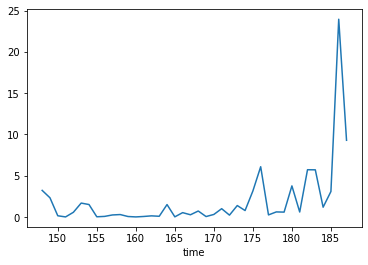

In [14]:
inten_40[:,60:90,140:170].mean(dim=['lat','lon']).plot()